In [11]:
import torch
import numpy as np
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
print(x_data)

tensor([[1, 2],
        [3, 4]])


In [15]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
print(np_array, "\n")
print(x_np)

[[1 2]
 [3 4]] 

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)


In [29]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print("Random Tensor: \n {rand_tensor} \n")
print("Ones Tensor: \n {ones_tensor} \n")
print("Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 {rand_tensor} 

Ones Tensor: 
 {ones_tensor} 

Zeros Tensor: 
 {zeros_tensor}


In [27]:
tensor = torch.rand(3,4)

print("Shape of tensor: {tensor.shape}")
print("Datatype of tensor: {tensor.dtype}")
print("Device tensor is stored on: {tensor.device}")

Shape of tensor: {tensor.shape}
Datatype of tensor: {tensor.dtype}
Device tensor is stored on: {tensor.device}


In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)


100%|█████████████████████████████████████████████████████████████████| 26421880/26421880 [00:05<00:00, 4886311.66it/s]


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|████████████████████████████████████████████████████████████████████████| 29515/29515 [00:00<00:00, 233752.55it/s]


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100%|███████████████████████████████████████████████████████████████████| 4422102/4422102 [00:03<00:00, 1353623.39it/s]


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████████████████████████████████████████████████████████████████████████████████| 5148/5148 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



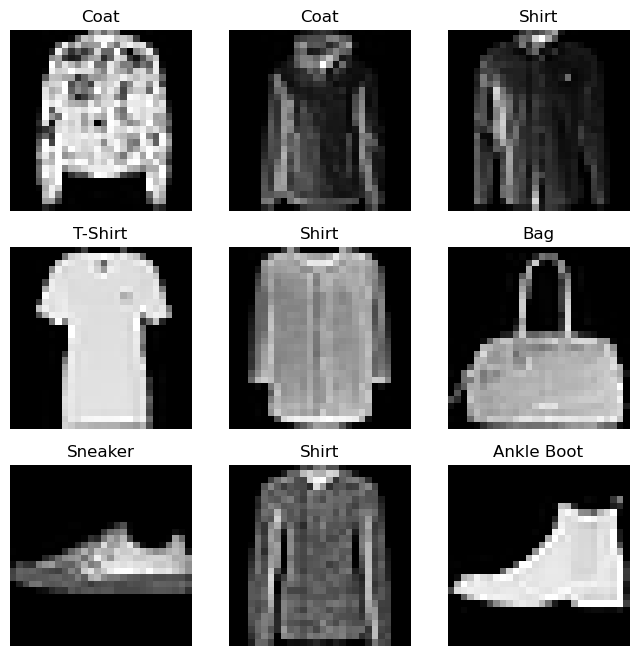

In [3]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [5]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [7]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [9]:
x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [11]:
print("Gradient function for z = {z.grad_fn}")
print("Gradient function for loss = {loss.grad_fn}")

Gradient function for z = {z.grad_fn}
Gradient function for loss = {loss.grad_fn}


In [13]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.0643, 0.3171, 0.1627],
        [0.0643, 0.3171, 0.1627],
        [0.0643, 0.3171, 0.1627],
        [0.0643, 0.3171, 0.1627],
        [0.0643, 0.3171, 0.1627]])
tensor([0.0643, 0.3171, 0.1627])
